# Reading and translating scanned documents

- Reading and extracting text from a single PDF file that contains scanned documents can pose several challenges, particularly because the content is stored as images rather than selectable text,  which means that any text is part of the image itself and not inherently selectable or searchable. To extract text from such images, you would need to perform Optical Character Recognition (OCR). it is often necessary to use a combination of libraries such as PyPDF2 or PyMuPDF for PDF handling and Tesseract OCR for OCR tasks, along with custom scripts for post-processing the OCR output.

# Import libraries

In [1]:

import os
import fitz  # PyMuPDF
from PIL import Image

import pytesseract
from PIL import Image
import re

import openai
openai.api_key = 

from docx import Document



# Define main functions used for processing

In [2]:
# Extract individual pdf page and save as png image
def convert_pdf_to_images(pdf_file_path, output_folder):
    """ Open the PDF file using PyMuPDF and call page_to_image function to save page as image"""
    pdf_document = fitz.open(pdf_file_path)

    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Process each page and save it as an image
    for page_number in range(pdf_document.page_count):
        # Get the current page
        page = pdf_document[page_number]

        # Convert the page to an image
        img = page_to_image(page)

        # Save the image to the output folder
        image_path = os.path.join(output_folder, f"page_{page_number + 1}.png")
        img.save(image_path)

    # Close the PDF document
    pdf_document.close()

# Take individual page previously save as
def page_to_image(page):
    """ Convert the PDF page to an image using PyMuPDF"""
    # We'll use the highest resolution (DPI) available (300 DPI)
    pix = page.get_pixmap(matrix=fitz.Matrix(300/72, 300/72))
    image = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

    return image

if __name__ == "__main__":
    pdf_file_path = 'input_files/Scanned_document.pdf'
    output_folder = 'output_images'

    convert_pdf_to_images(pdf_file_path, output_folder)


In [3]:
# Creatte a list to store the names of previously created images
pdf_folder = "output_images/"
count = 0
files_path = []
for file in os.listdir(pdf_folder):
    if file.endswith('.png'):
        pdf_file = os.path.join(pdf_folder, file)
        files_path.append(pdf_file)
        count+=1
#         print(pdf_file)

print()
print(f'Number of PDF files: {count}')  
print(files_path)


Number of PDF files: 13
['output_images/page_1.png', 'output_images/page_10.png', 'output_images/page_11.png', 'output_images/page_12.png', 'output_images/page_13.png', 'output_images/page_2.png', 'output_images/page_3.png', 'output_images/page_4.png', 'output_images/page_5.png', 'output_images/page_6.png', 'output_images/page_7.png', 'output_images/page_8.png', 'output_images/page_9.png']


In [4]:
# print(files_path) show that file names are not stored in ascending order as in the PDF file
# The Following  steps is used to restore the page order.

# Sort the list based on the numeric part of the filenames
sorted_files = sorted(files_path, key=lambda filename: int(filename.split('_')[-1].split('.')[0]))

files_path = sorted_files

# Reprint the images names with the correct order
print(files_path)

['output_images/page_1.png', 'output_images/page_2.png', 'output_images/page_3.png', 'output_images/page_4.png', 'output_images/page_5.png', 'output_images/page_6.png', 'output_images/page_7.png', 'output_images/page_8.png', 'output_images/page_9.png', 'output_images/page_10.png', 'output_images/page_11.png', 'output_images/page_12.png', 'output_images/page_13.png']


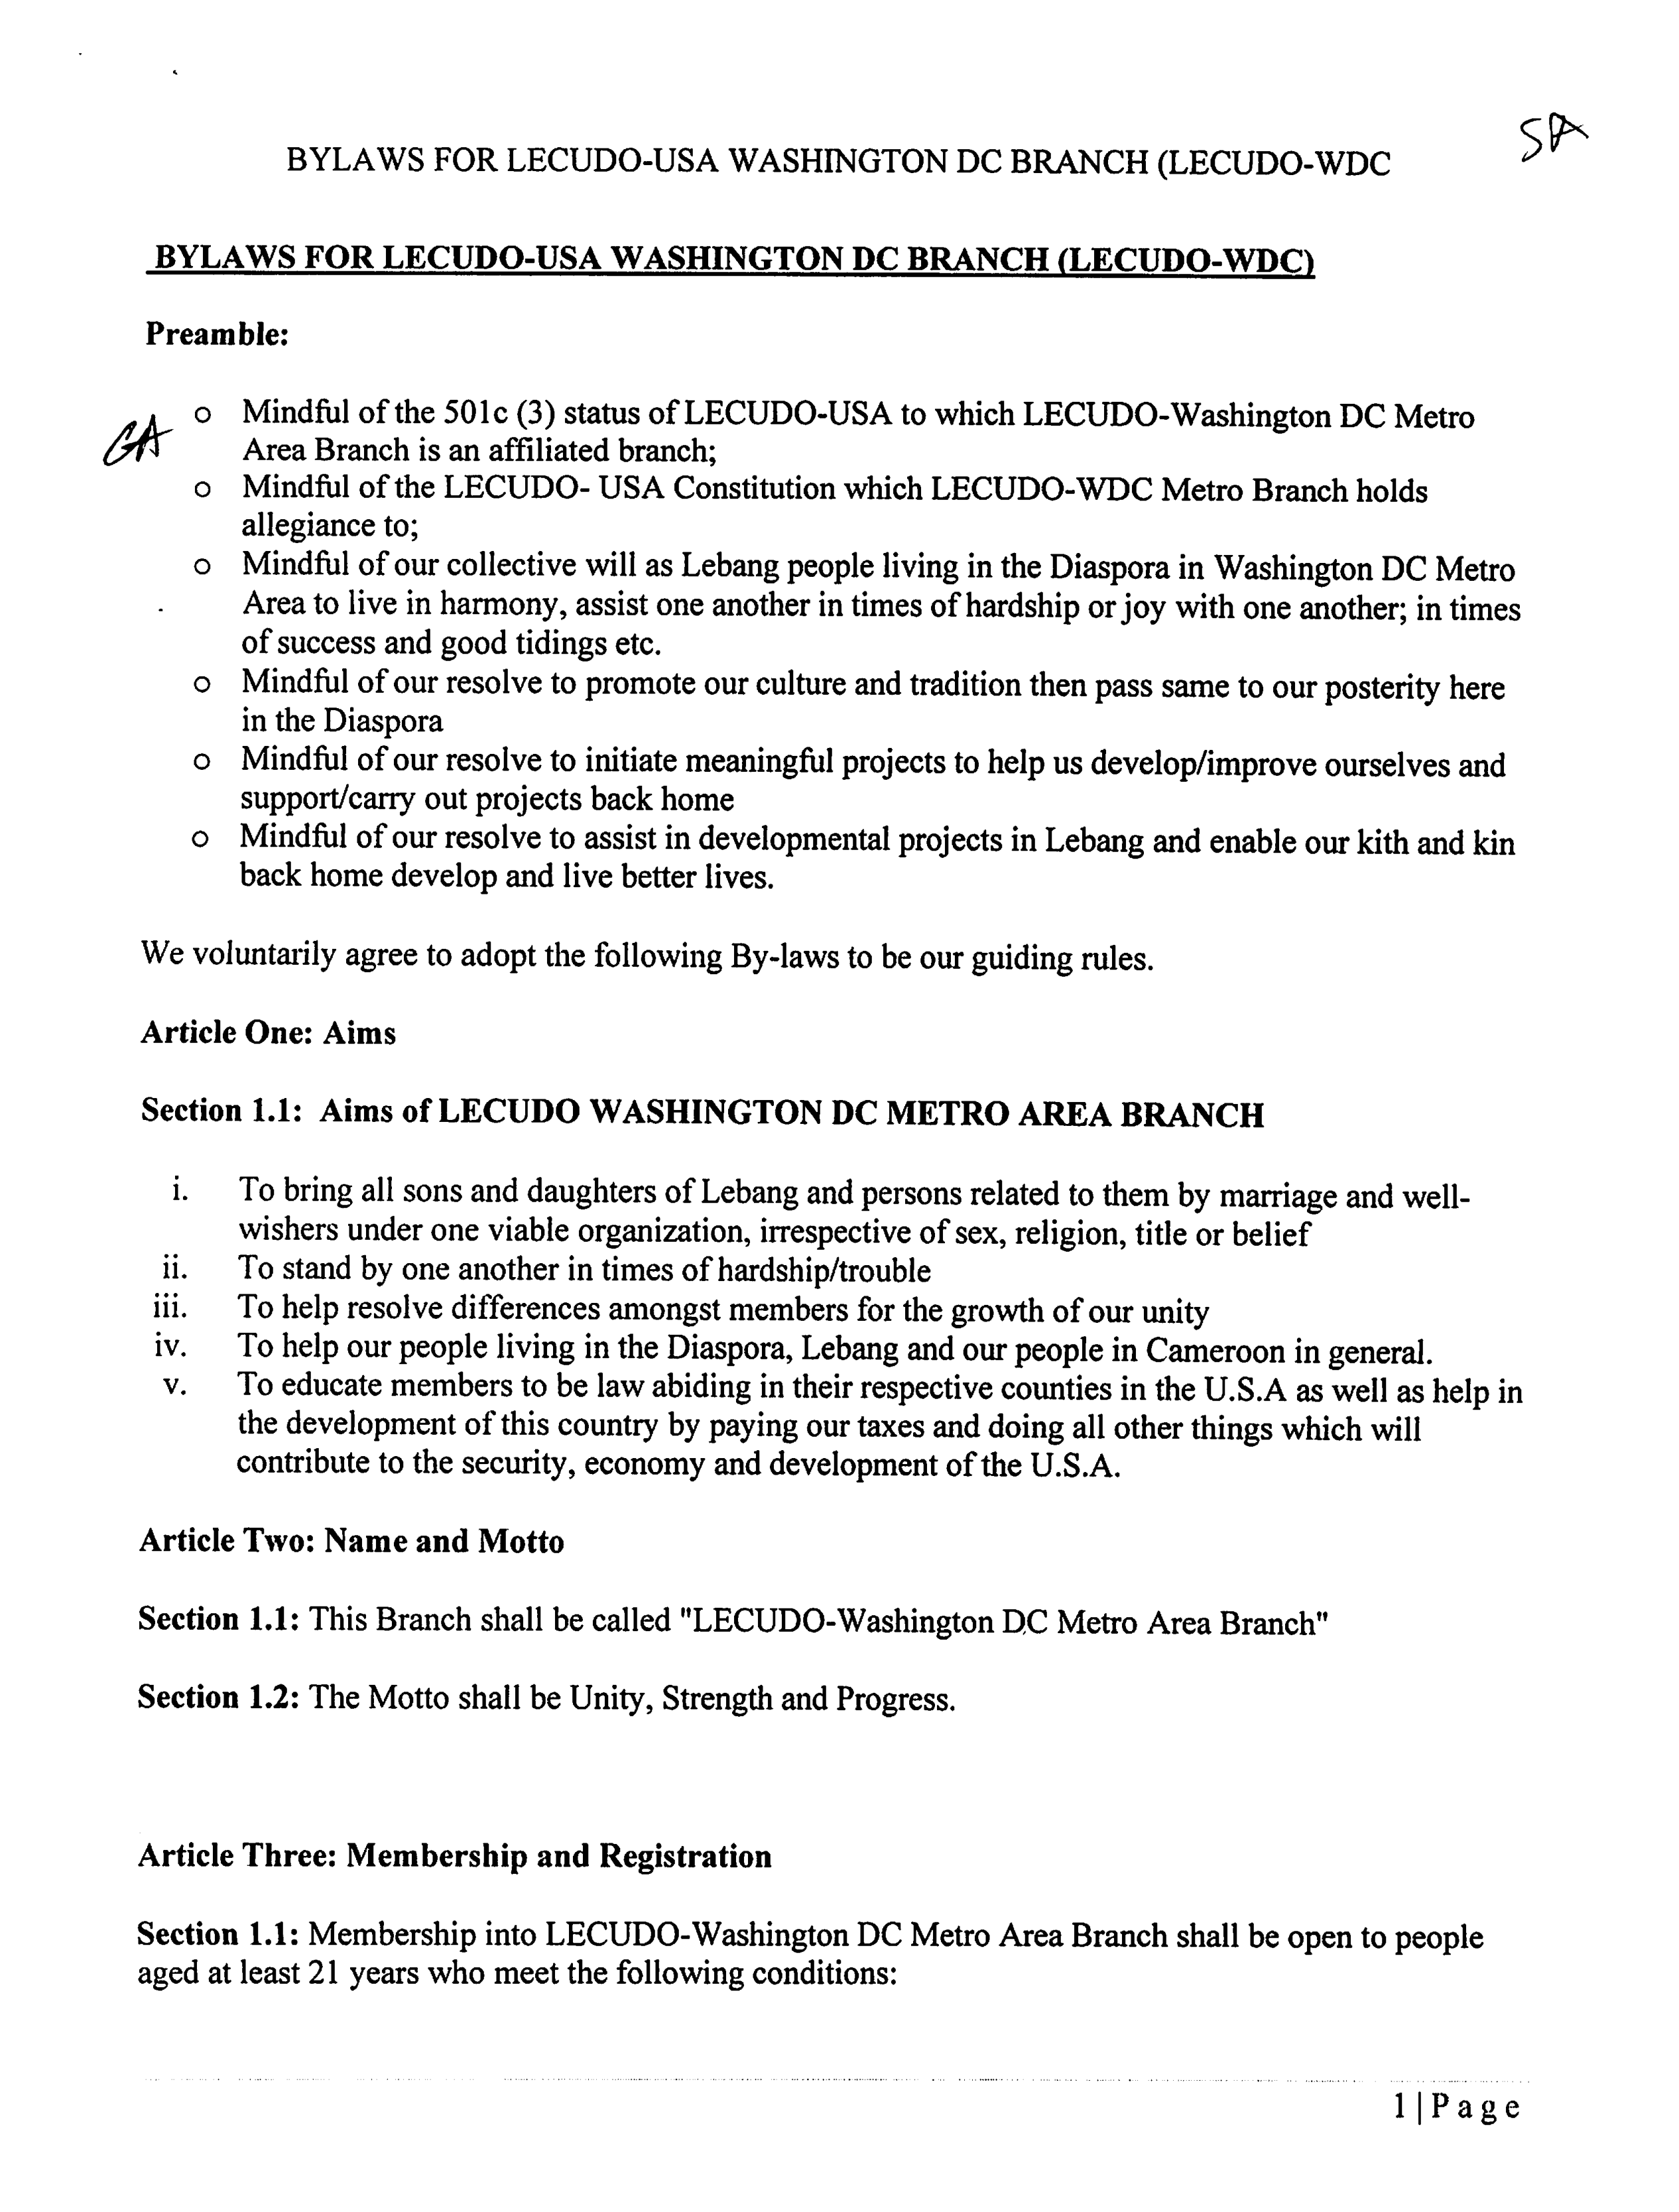

In [5]:
# Print one image  for review
img = Image.open(files_path[0])
# img.show()
display(img)

# Extract text from images

In [6]:
# Extrac text from images created previously


# Define the regular expression pattern for basic clean up match '1|Page'
pattern_to_remove = r'\d+\|Page'


# Set the path to the Tesseract OCR executable (only necessary for Windows)
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\herve\AppData\Local\Programs\Tesseract-OCR\tesseract.exe' # Adjust the path accordingly


full_text = []
for file in files_path:
    img = Image.open(file)

    # Extract text from the image
    text = pytesseract.image_to_string(img)
#     remove some useless patterns
    text = re.sub(pattern_to_remove, '', text)
    full_text.append(text)


    # print first page
print(full_text[0])

SP

BYLAWS FOR LECUDO-USA WASHINGTON DC BRANCH (LECUDO-WDC

BYLAWS FOR LECUDO-USA WASHINGTON DC BRANCH (LECUDO-WDC)

Preamble:

Mindful of the 501c (3) status of LECUDO-USA to which LECUDO-Washington DC Metro
Area Branch is an affiliated branch;

Mindful of the LECUDO- USA Constitution which LECUDO-WDC Metro Branch holds
allegiance to;

Mindful of our collective will as Lebang people living in the Diaspora in Washington DC Metro
Area to live in harmony, assist one another in times of hardship or joy with one another; in times
of success and good tidings etc.

Mindful of our resolve to promote our culture and tradition then pass same to our posterity here
in the Diaspora

Mindful of our resolve to initiate meaningful projects to help us develop/improve ourselves and
support/carry out projects back home

Mindful of our resolve to assist in developmental projects in Lebang and enable our kith and kin
back home develop and live better lives.

We voluntarily agree to adopt the following By-

# Translate the text into a  desired language (french in this case)

- NOTE: Please be advised that our translation process is conducted on a per-page basis. This method may result in inaccuracies when text flows continuously across page boundaries. To mitigate this, we recommend consolidating the entire document into a single string. This should be followed by segmenting (chunking) the text into manageable sections, which can then be translated individually to ensure greater accuracy.


In [7]:
# Translate the text document using OpenAI API
translated_doc = []
target_language = 'French'

for page in full_text:   

    response = openai.ChatCompletion.create(
      model="gpt-3.5-turbo-16k",
#         model="gpt-4",
      messages=[
        {
          "role": "system",
          "content": f"""You will be provided with a sentence in English, and your task is to translate it into {target_language}."""
        },
        {
          "role": "user",
          "content": page
        }
 
      ],
      temperature=0,
      max_tokens=1500,
      top_p=1,
      frequency_penalty=0,
      presence_penalty=0
    )
    
    translated_doc.append(response.choices[0].message.content)
    

# Save the translated document in word document

In [8]:


# Create a new Word document
doc = Document()
output_file_name = "output_files/translated_documents_" + target_language + ".docx"

# Add each string as a paragraph in the document
for text in translated_doc:
    doc.add_paragraph(text)
#     doc.add_page_break()

# Save the document to a file
doc.save(output_file_name)

print("Word document created successfully.")


Word document created successfully.
